In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

1. Import the dataset and do usual data analysis steps like checking the structure & characteristics of the dataset

In [ ]:
df = pd.read_csv('aerofit_treadmill.csv')

In [ ]:
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


Columns like Product, Gender & Maritalstatus are in string data (object) type and all other are interger typr data (int64)

In [ ]:
Rows, Col = df.shape

In [ ]:
print('Row =',Rows,' & Col = ', Col)

Row = 180  & Col =  9


There is no Nulls in any rows or col data.

In [ ]:
df['Product'].unique()

array(['KP281', 'KP481', 'KP781'], dtype=object)

In [ ]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
df['MaritalStatus'].unique()

array(['Single', 'Partnered'], dtype=object)

2. Detect Outliers (using boxplot, “describe” method by checking the difference between mean and median)

In [ ]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [ ]:
median_Age = df['Age'].median()
median_Education = df['Education'].median()
median_Usage = df['Usage'].median()
median_Fitness = df['Fitness'].median()
median_Income = df['Income'].median()
median_Miles = df['Miles'].median()
print('Median of Age',median_Age)
print('Median of Education',median_Education)
print('Median of Usage',median_Usage)
print('Median of Fitness',median_Fitness)
print('Median of Income',median_Income)
print('Median of Miles',median_Miles)

Median of Age 26.0
Median of Education 16.0
Median of Usage 3.0
Median of Fitness 3.0
Median of Income 50596.5
Median of Miles 94.0


<Axes: ylabel='Miles'>

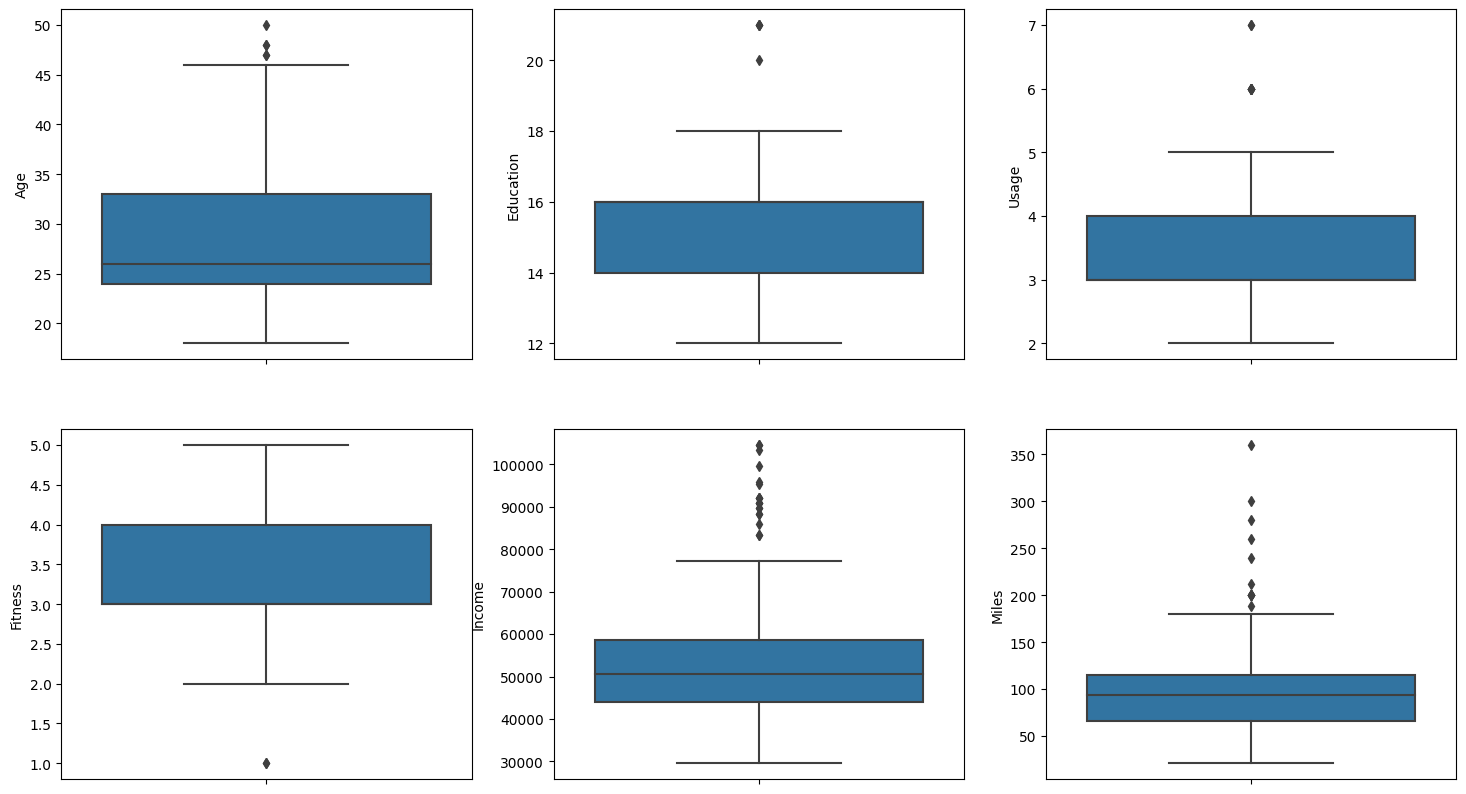

In [ ]:
plt.figure(figsize=(18,10))
plt.subplot(2,3,1)
sns.boxplot(y=df['Age'])

plt.subplot(2,3,2)
sns.boxplot(y=df['Education'])

plt.subplot(2,3,3)
sns.boxplot(y=df['Usage'])

plt.subplot(2,3,4)
sns.boxplot(y=df['Fitness'])

plt.subplot(2,3,5)
sns.boxplot(y=df['Income'])

plt.subplot(2,3,6)
sns.boxplot(y=df['Miles'])

Almost all coloumn data have outlier which may affact my data analysis in term of Mean mode median.

Example -For Age:
            Q3 = 33
            Upper outlier = Q3 + (1.5 * IQR)
                            33 + (1.5 * (33-24))
                            46.5

<Axes: xlabel='Product', ylabel='Age'>

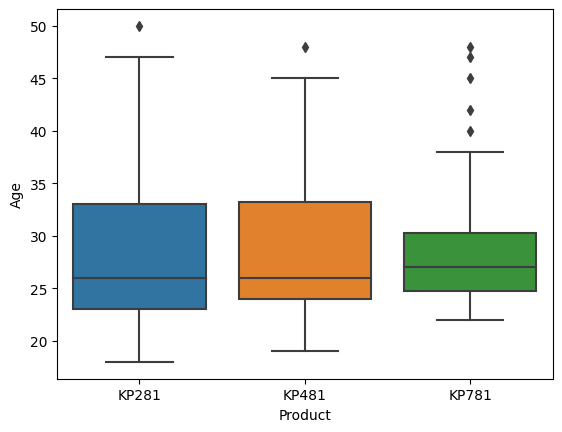

In [ ]:
sns.boxplot(x=df['Product'], y=df['Age'])

3. Check if features like marital status, age have any effect on the product purchased
(using countplot, histplots, boxplots etc)

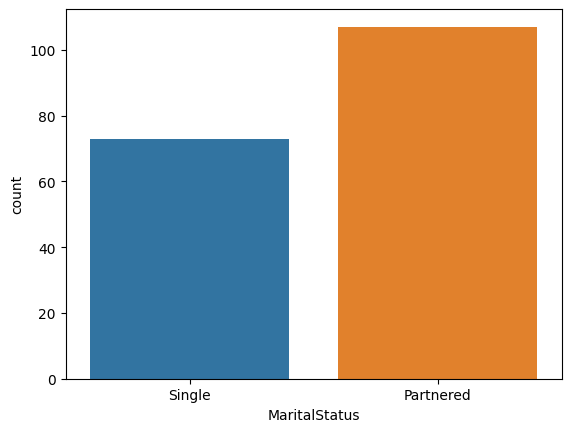

In [ ]:
sns.countplot(data=df, x = df['MaritalStatus'])
plt.show()

Partnered people are purchasing more of this machines.

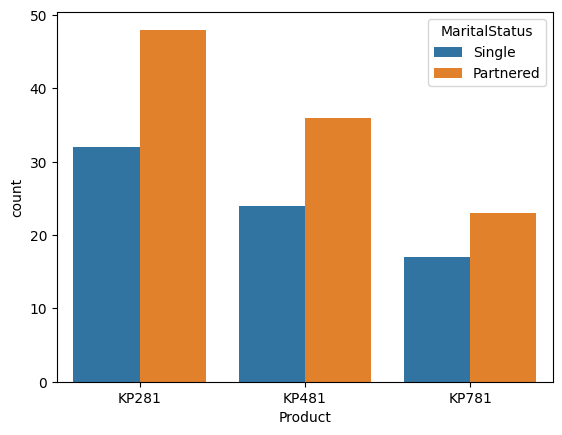

In [ ]:
sns.countplot(data=df, x = df['Product'], hue = df['MaritalStatus'])
plt.show()

Both singles & Partnered are purchasing KP281 mostly and Both singles & Partnered are purchasing KP781 less.

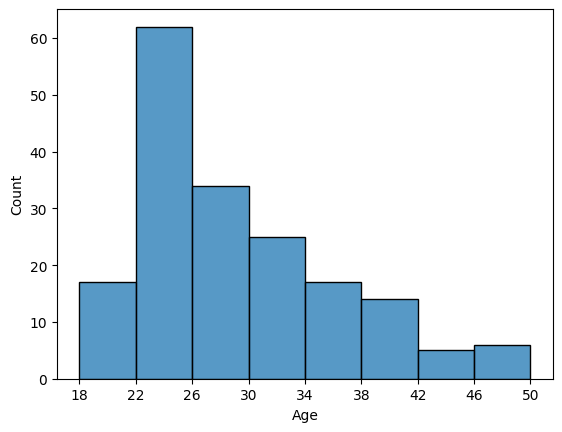

In [ ]:
sns.histplot(df['Age'], bins = 8)
plt.xticks([18,22,26,30,34,38,42,46,50])
plt.show()

Peolpe between age 22 to 34 are purchasing more of this product.

4. Representing the marginal probability like - what percent of customers have purchased KP281, KP481, or KP781 in a table
(can use pandas.crosstab here)

In [ ]:
pd.crosstab(df.Product, df.Product.count(), normalize = True)

col_0,180
Product,
KP281,0.444444
KP481,0.333333
KP781,0.222222


So the chances of selling KP281 is more when ever a customer coming for purchase.

In [ ]:
df['Product'].value_counts().index

Index(['KP281', 'KP481', 'KP781'], dtype='object')

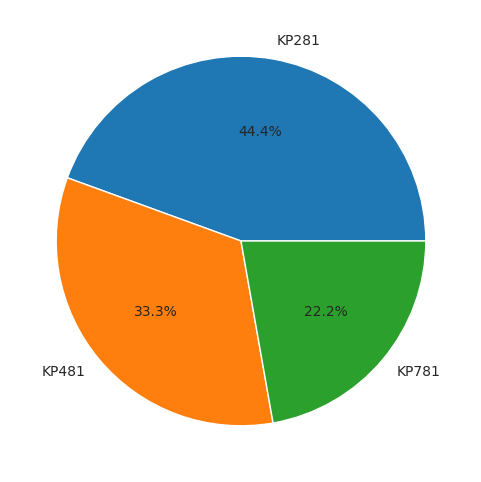

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(6,6))
plt.pie(df['Product'].value_counts(), labels=df['Product'].value_counts().index, autopct='%1.1f%%')
plt.show()

44.4% of peopel purchased KP281, 33.3% peolpe purchased KP481, 22.2% of people purchased KP781.

5. Check correlation among different factors using heat maps or pair plots.

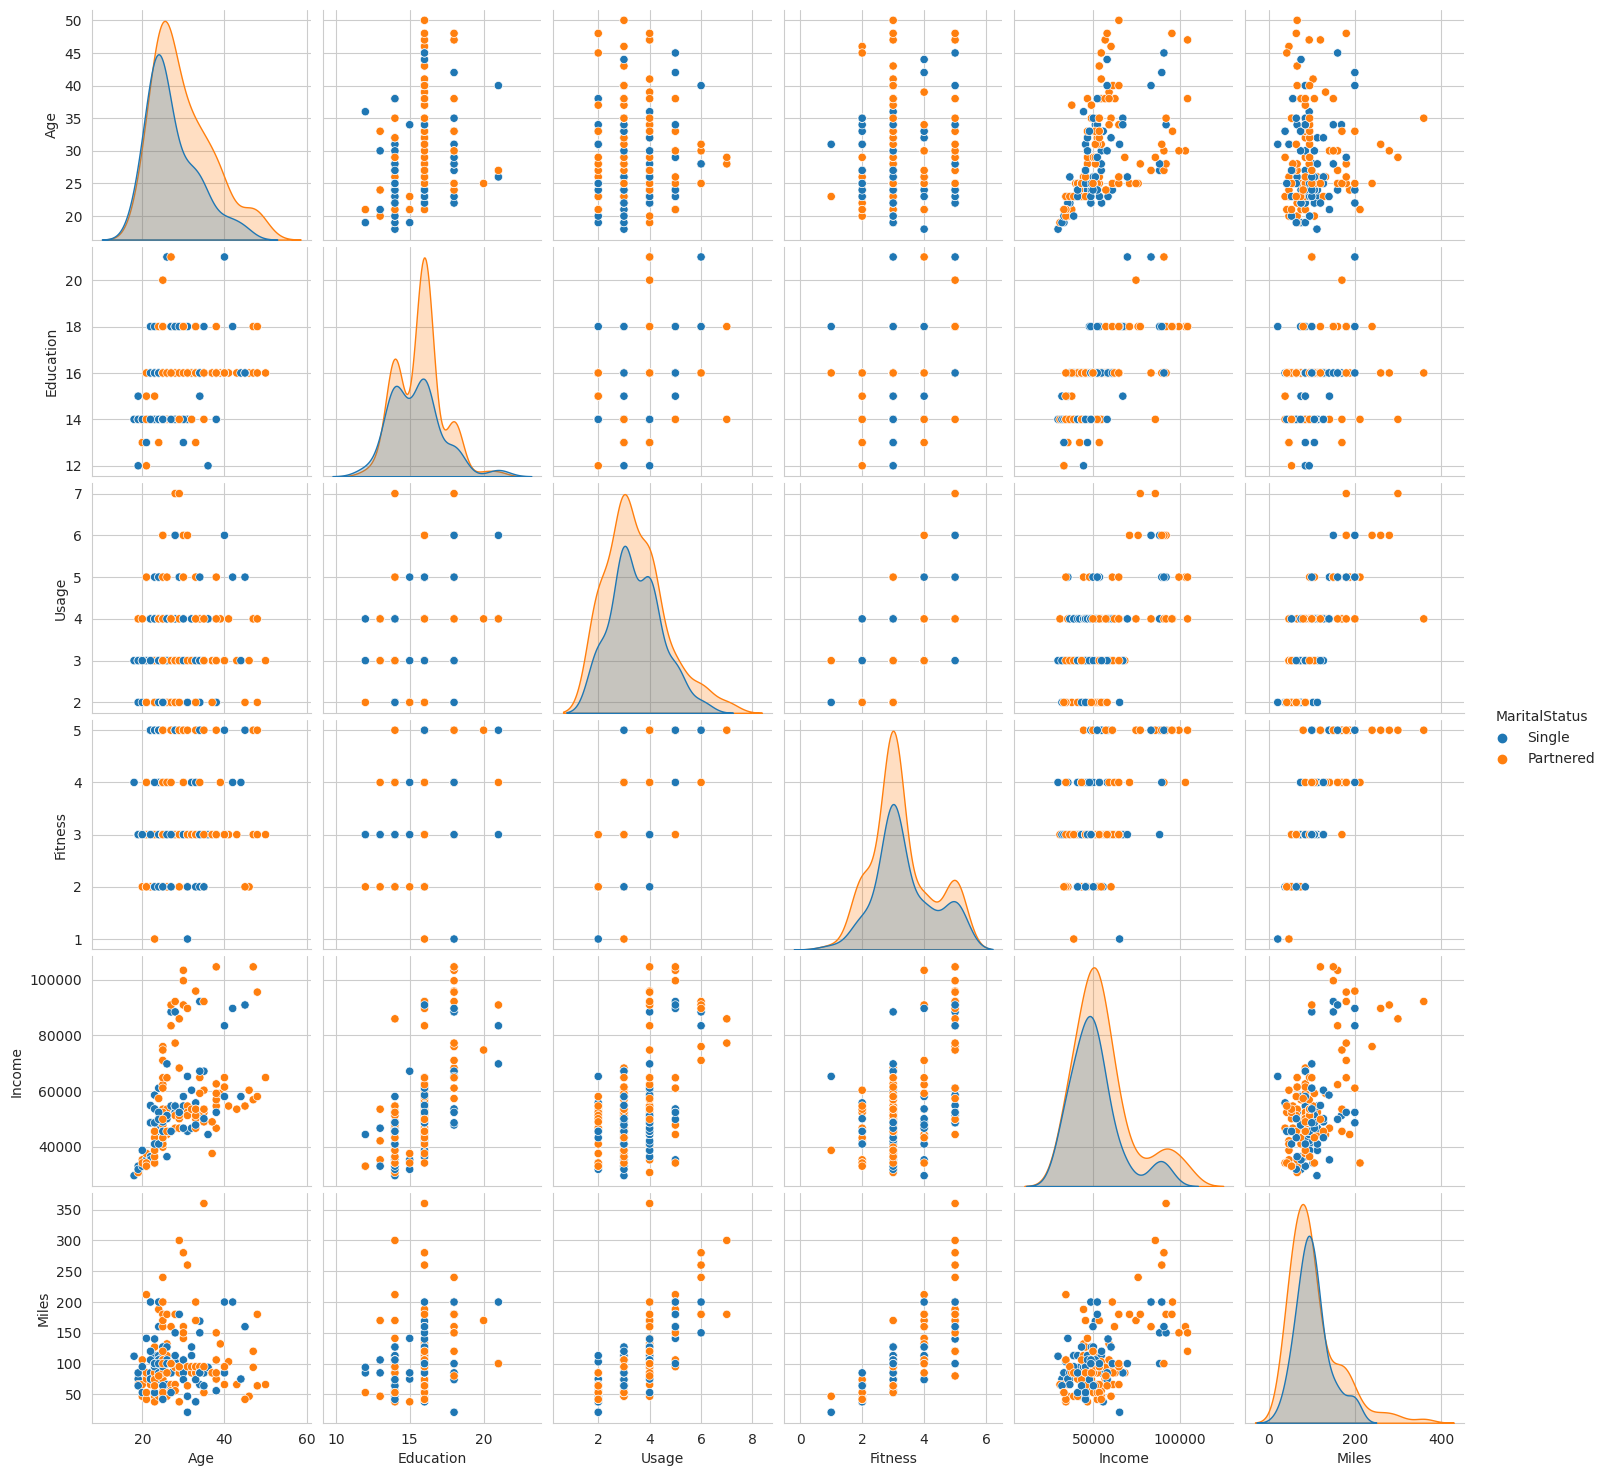

In [ ]:
sns.pairplot(data=df , hue = 'MaritalStatus')
plt.show()

In [ ]:
df.corr()

<ipython-input-21-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


<ipython-input-22-388ba3be6dd9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='Blues', annot=True)


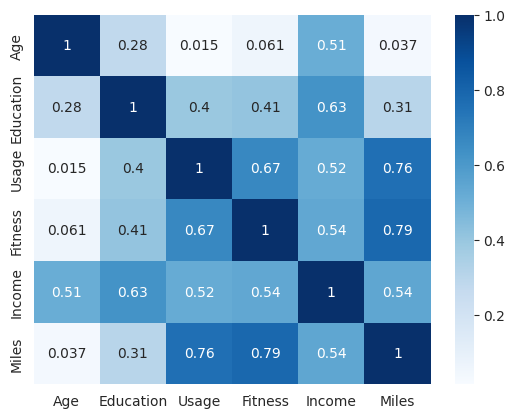

In [ ]:
sns.heatmap(df.corr(), cmap='Blues', annot=True)
plt.show()

Miles Vs Fitness having highest positive correlation 0.78

This show that all are having positive correlation

6. With all the above steps you can answer questions like: What is the probability of a male customer buying a KP781 treadmill?

In [ ]:
pd.crosstab(df.Gender, df.Product, normalize =True )

Product,KP281,KP481,KP781
Gender,,,
Female,0.222222,0.161111,0.038889
Male,0.222222,0.172222,0.183333


Probability of male purchasing KP781 is 0.1833 i.e 18.3%
Same can be said for others also from this table.

In [ ]:
df['Gender'].value_counts(normalize=True)

Male      0.577778
Female    0.422222
Name: Gender, dtype: float64

Probalaity of Female purchasing is less than male

7. Customer Profiling - Categorization of users.

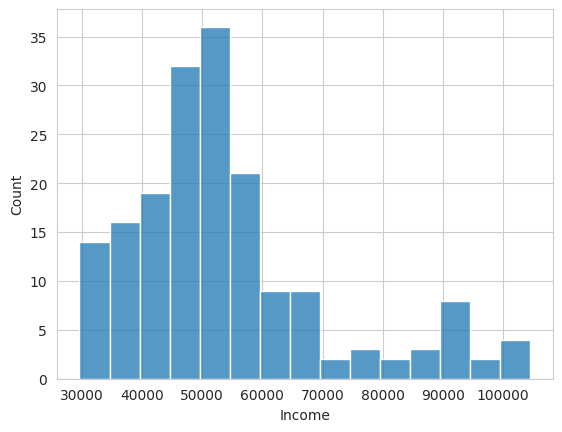

In [ ]:
sns.histplot(df['Income'])
plt.show()

In [ ]:
def profile(s):
  if s < 35000:
    return 'Low'
  elif s>=35000 and s<65000:
        return "Medium"
  else:
    return 'High'

In [ ]:
df["Profile"] = df["Income"].apply(profile)

In [ ]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Profile
0,KP281,18,Male,14,Single,3,4,29562,112,Low
1,KP281,19,Male,15,Single,2,3,31836,75,Low
2,KP281,19,Female,14,Partnered,4,3,30699,66,Low
3,KP281,19,Male,12,Single,3,3,32973,85,Low
4,KP281,20,Male,13,Partnered,4,2,35247,47,Medium


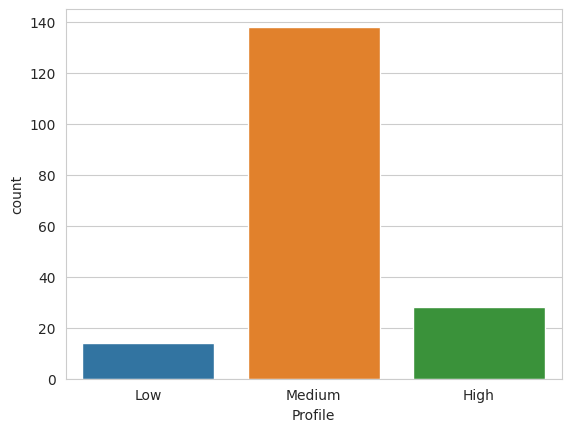

In [ ]:
sns.countplot(x=df['Profile'])
plt.show()

We categorise the cutomer as per their salary.
Low if <35000
Mededium if >=35000 & <65000
High if >=65000

We have observed that people with Medium profile are purchasing most.

Recommendations and actionable insights

1. We have seen that partnered people are purchasing more, People being in Medium profile purchasing more.
   So for them we can given some offers to increase the sells even better.

2. Because KP781 is least purchase comparitivly, we should do something to increse the sale.
    a. Recomending it to higher profile peolpe becuase it costly so they can only afford.
    b. Giving some proper demo of its feature to customer breifly for more sales.

3. From pairplot we have seen peolpe between the age of 20 to 40 have more usage. (Age VS usage)
    a. We can invite those age group people for some kind of physical trainig camping which will also promote our
       product and thus sales increase.

4. From probalaity we can see femal has less chance of purchasing this, we can target femal customer by encouragin them for
   health fitness, this will also increase sales.